In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

Below is a definition of each column in dataset:

### **1. Identifiers**
- **id**: (Integer) Unique identifier for each patient.

### **2. Demographics**
- **age**: (Integer) Age of the patient in years.
- **sex**: (Categorical) Gender of the patient (male, female).
- **race**: (Categorical) Race of the patient (asian, black, hispanic, missing, other, white).
- **edu**: (Integer) Years of education.
- **income**: (Categorical) Income category ("under11k", "11−25k", "25−50k", ">50k").

### **3. Medical Conditions**
- **dzgroup**: (Categorical) Disease subcategory (e.g., ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, etc.).
- **dzclass**: (Categorical) Disease category (ARF/MOSF, COPD/CHF/Cirrhosis, Cancer, Coma).
- **num.co**: (Integer) Number of comorbidities (higher values indicate worse condition).
- **diabetes**: (Binary) Presence of diabetes (Y/N).
- **dementia**: (Binary) Presence of dementia (Y/N).
- **ca**: (Categorical) Cancer status (yes, metastatic, no).

### **4. Hospitalization & Treatment**
- **hday**: (Integer) Day in hospital at which the patient entered the study.
- **dnr**: (Categorical) Do Not Resuscitate (DNR) status (dnr after sadm, dnr before sadm, missing, no dnr).
- **dnrday**: (Integer) Day of DNR order (<0 if before study).
- **charges**: (Float) Hospital charges.
- **totcst**: (Float) Total ratio of costs to charges.
- **totmcst**: (Float) Total micro cost.
- **avtisst**: (Float) Average TISS score (Therapeutic Intervention Scoring System).

### **5. Physiological & Lab Measurements (Day 3)**
- **scoma**: (Float) Coma Score based on the Glasgow scale.
- **sps**: (Float) SUPPORT physiology score.
- **aps**: (Float) APACHE III day 3 physiology score.
- **meanbp**: (Float) Mean arterial blood pressure.
- **wblc**: (Float) White blood cell count (in thousands).
- **hrt**: (Integer) Heart rate.
- **resp**: (Integer) Respiration rate.
- **temp**: (Float) Temperature (Celsius).
- **pafi**: (Float) PaO2/FiO2 ratio.
- **alb**: (Float) Serum albumin levels.
- **bili**: (Float) Bilirubin levels.
- **crea**: (Float) Serum creatinine levels.
- **sod**: (Float) Serum sodium concentration.
- **ph**: (Float) Arterial blood pH.
- **glucose**: (Float) Blood glucose level.
- **bun**: (Float) Blood urea nitrogen level.
- **urine**: (Float) Urine output.

### **6. Functional & Survival Predictions**
- **adlp**: (Float) Activities of Daily Living (ADL) score (self-reported).
- **adls**: (Float) ADL score (reported by a surrogate, e.g., family member).
- **adlsc**: (Float) Imputed ADL Calibrated to Surrogate.
- **surv2m**: (Float) SUPPORT model 2-month survival estimate.
- **surv6m**: (Float) SUPPORT model 6-month survival estimate.
- **prg2m**: (Float) Physician’s 2-month survival estimate.
- **prg6m**: (Float) Physician’s 6-month survival estimate.

### **7. Target Variable**
- **death**: (Binary) Whether the patient died (1) or survived (0).



## 1. Data Understanding & Exploration

In [2]:
df = pd.read_csv('HealthRiskData\dataset.csv')
df.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
count,7284.000000,7284.000000,5969.000000,7283.000000,7.156000e+03,6575.000000,4506.000000,7218.000000,7283.000000,7283.000000,...,7284.000000,5468.000000,3691.000000,3816.000000,3407.000000,2768.000000,4988.000000,7284.000000,7284.000000,7284.000000
mean,62.651689,1.875206,11.718211,12.237539,6.005533e+04,30510.032023,28747.116082,22.581808,25.618397,37.704105,...,137.591708,7.415360,159.256028,32.397274,2192.288927,1.158237,1.624900,1.877531,0.682867,3641.500000
std,15.619063,1.347470,3.466423,24.696769,1.043454e+05,45044.530406,43679.696692,13.192527,9.962643,19.899105,...,6.003795,0.080656,87.876500,26.741968,1468.096769,1.731184,2.212638,1.987490,0.465392,2102.854013
min,18.118990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,1.199951,0.000000,...,112.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.767000,1.000000,10.000000,0.000000,9.821750e+03,5968.294950,5181.085940,12.000000,19.000000,23.000000,...,134.000000,7.379883,102.000000,14.000000,1165.000000,0.000000,0.000000,0.000000,0.000000,1820.750000
50%,64.882965,2.000000,12.000000,0.000000,2.535552e+04,14531.343800,13431.000000,19.666656,24.000000,35.000000,...,137.000000,7.419922,134.000000,23.000000,1950.000000,0.000000,1.000000,1.000000,1.000000,3641.500000
75%,74.089737,3.000000,14.000000,9.000000,6.433375e+04,35765.031300,34046.632850,31.500000,30.296875,49.000000,...,141.000000,7.469727,186.000000,42.000000,2995.000000,2.000000,3.000000,3.000000,1.000000,5462.250000
max,100.849000,8.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,78.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,7283.000000


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,24613.29690,14.333328,black,32.398438,40.0,0.772949,0.637939,1,0,0,no,0.95,0.90,no dnr,15.0,73.0,4.899414,95.0,26.0,37.50000,NaN,2.099609,0.299988,2.599609,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,7590.22656,15.500000,white,18.898438,43.0,0.763916,0.625000,1,0,0,yes,0.20,0.05,dnr after sadm,1.0,124.0,5.599609,114.0,24.0,36.59375,200.0000,3.799805,0.399963,1.199951,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,NaN,38.500000,white,32.296875,44.0,0.569946,0.458984,58,0,0,no,0.30,0.30,no dnr,281.0,51.0,16.699219,96.0,30.0,37.39844,108.5625,2.399902,1.000000,0.699951,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,33310.15620,24.500000,white,25.398438,35.0,0.647949,0.547974,9,0,0,no,NaN,NaN,no dnr,9.0,79.0,12.099609,40.0,15.0,35.59375,355.0000,3.599609,0.799927,1.199951,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,1559.00000,15.000000,black,34.398438,44.0,0.447998,0.136993,1,0,0,metastatic,0.00,0.00,no dnr,5.0,105.0,9.298828,135.0,6.0,35.79688,395.1875,NaN,5.199219,5.099609,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4


#### 1.1. Check The Shape of The Dataset

In [4]:
df.shape

(7284, 44)

#### 1.2. Checking Class Imbalance in Dataset

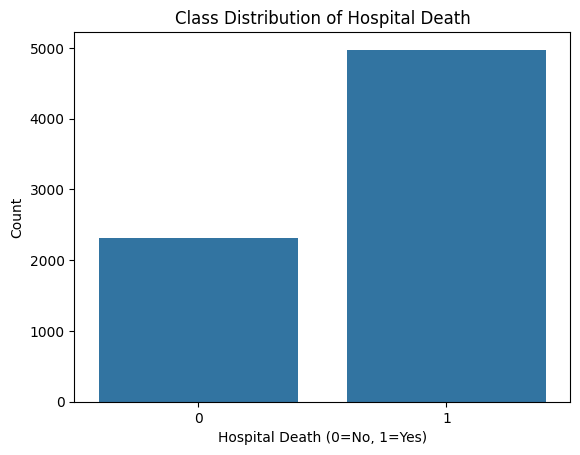

In [5]:
sns.countplot(x=df['death'])
plt.title("Class Distribution of Hospital Death")
plt.xlabel("Hospital Death (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


#### 1.3. Check Data Types

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for col in categorical_cols: print(col, end=", ")

Categorical Columns:
sex, dzgroup, dzclass, income, race, ca, dnr, 

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns: ")

for col in numerical_cols: print(col, end=", ")


Numerical Columns: 
age, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, diabetes, dementia, prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, death, Id, 

#### 1.4. Checking Missing values in Dataset

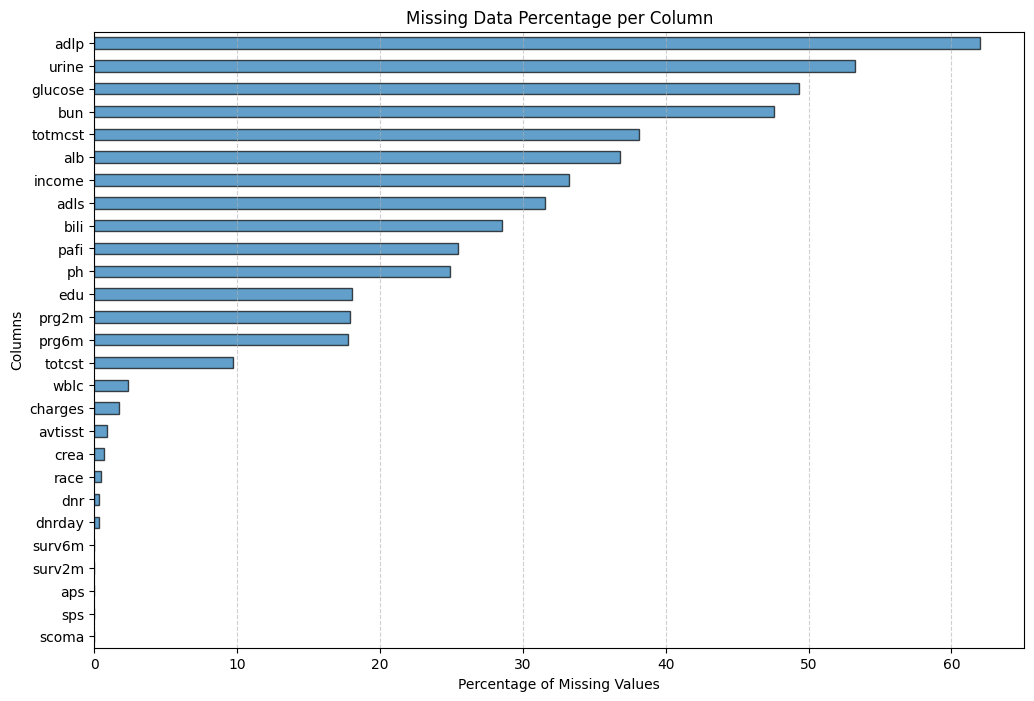

In [8]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns.sort_values()

plt.figure(figsize=(12, 8))
missing_columns.sort_values().plot(kind='barh', edgecolor='black',alpha=0.7)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Data Percentage per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

In [9]:
missing_columns.sort_values()

scoma       0.013729
sps         0.013729
aps         0.013729
surv2m      0.013729
surv6m      0.013729
dnrday      0.343218
dnr         0.343218
race        0.453048
crea        0.686436
avtisst     0.906096
charges     1.757276
wblc        2.388797
totcst      9.733663
prg6m      17.737507
prg2m      17.915980
edu        18.053267
ph         24.931356
pafi       25.466776
bili       28.528281
adls       31.521142
income     33.209775
alb        36.834157
totmcst    38.138386
bun        47.611203
glucose    49.327293
urine      53.226249
adlp       61.998902
dtype: float64

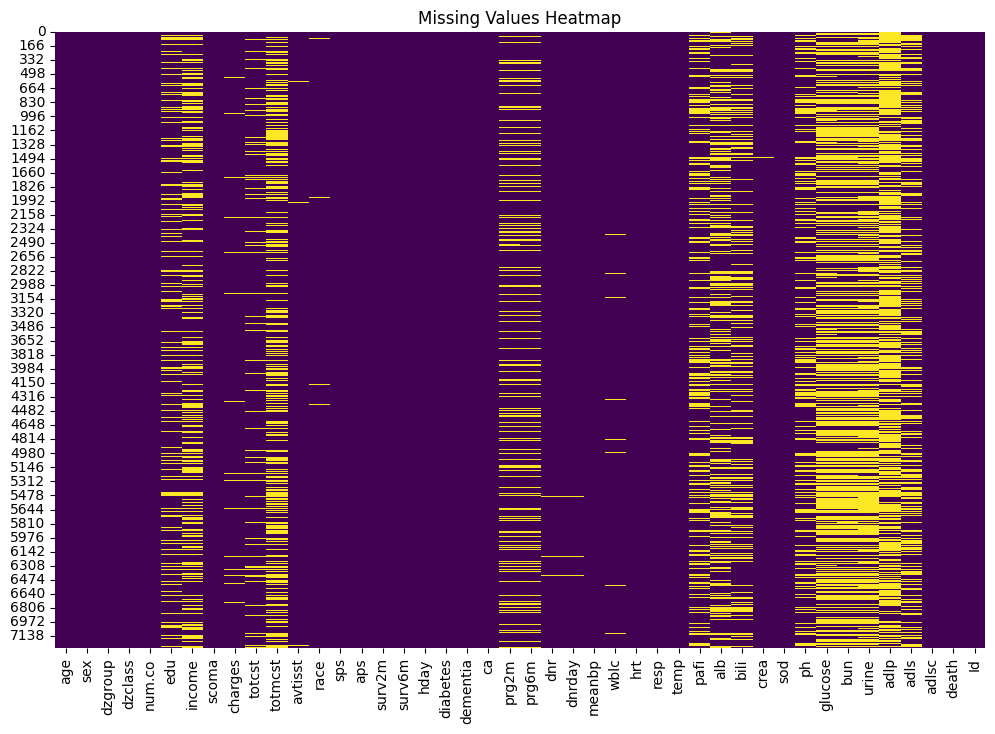

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### ***1.4.1 Merging `adlsc`, `adls`, and `adlp` features***
- Create a new column 'adl_final' based on priority:
- Use `adlsc` if available.
- If `adlsc` is missing, use `adlp`.
- If both are missing, use `adls`.

In [11]:
df['adl'] = df['adlsc'].fillna(df['adlp']).fillna(df['adls'])
df.drop(columns=['adlp', 'adls', 'adlsc'], inplace=True)
df['adl'].isnull().sum()

0

##### ***1.4.2. Drop Rows (A few Rows That Contain Missing Values In Specefied Columns)***
These features have very few missing values (<1%):

- `sps`     → 0.01%
- `aps`     → 0.01%
- `surv2m`  → 0.01%
- `surv6m`  → 0.01%
- `dnrday`  → 0.34%
- `dnr`     → 0.34%
- `race`    → 0.45%
- `crea`    → 0.68%



In [12]:
drop_columns = ['sps', 'aps', 'surv2m', 'surv6m', 'dnr', 'dnrday', 'race', 'crea']
df.dropna(subset=drop_columns,inplace=True)



##### ***1.4.3. Droping Cost Features Due To High Missing Values And They Are Not Informative***

- `totmcst`    →  ~38%
- `totcst`     →  ~10%
- `charges`    →  ~1.75%



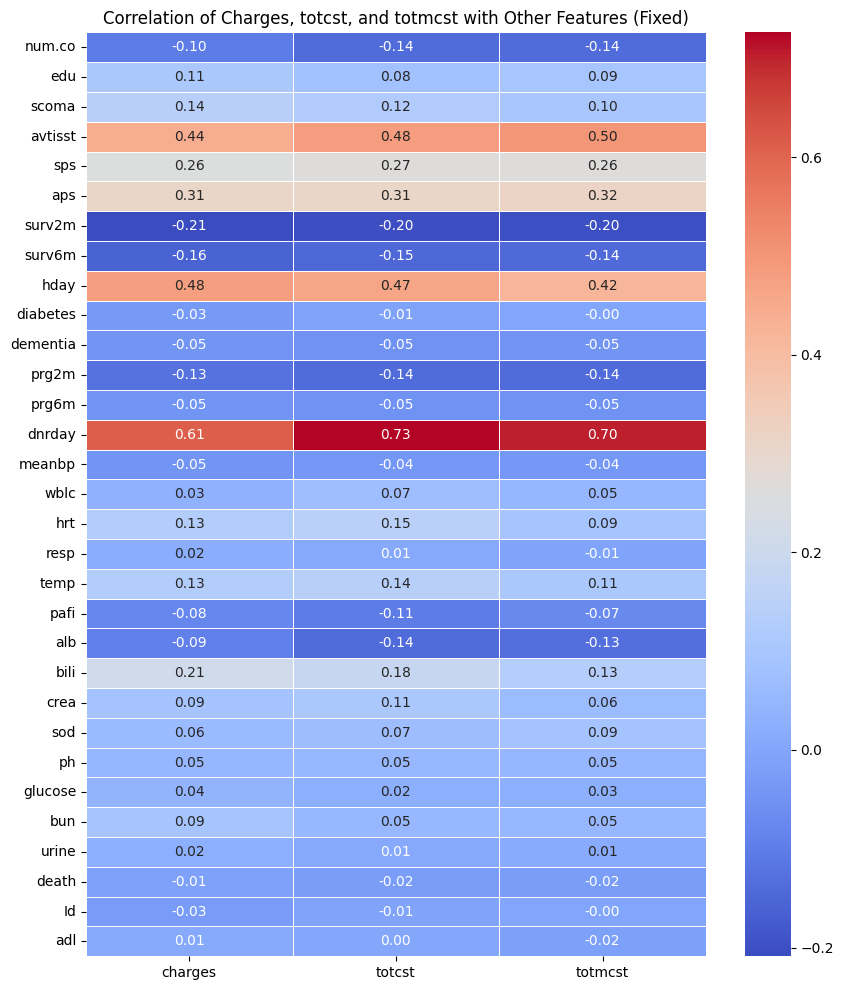

In [13]:
cost_features = ["charges", "totcst", "totmcst"]

excluded_features = ['ca', 'dnr', 'income', 'sex', 'age', 'race', 'dzgroup']

df_copy = df.copy()


# Drop non-numeric columns for correlation computation
df_numeric = df_copy.drop(columns=excluded_features, errors='ignore')

# Identify non-numeric columns in df_numeric
non_numeric_cols = df_numeric.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns
df_numeric_cleaned = df_numeric.drop(columns=non_numeric_cols, errors='ignore')

# Compute correlation with cost-related features
correlation_with_costs_fixed = df_numeric_cleaned.corr()[cost_features].drop(index=cost_features)

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_with_costs_fixed, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Charges, totcst, and totmcst with Other Features (Fixed)")
plt.show()


In [14]:
df.drop(columns=["charges", "totcst", "totmcst"], inplace=True)

##### ***1.4.4. Imputing Missing Values for Categorical and Numerical Features***

- **Features Imputed:**
  - `income` → **Mode Imputation** (Most Frequent Category)
  - `edu` → **Median Imputation**
  - `avtisst` → **Median Imputation**
  - `wblc` → **Median Imputation**

- **Imputation Strategy:**
  - **Categorical Feature (`income`)**:
    - Missing values are filled with the **most frequent category (mode)**.
    - Ensures minimal distortion in data distribution.
  
  - **Numerical Features (`edu`, `avtisst`, `wblc`)**:
    - Missing values are replaced with the **median** to avoid the impact of outliers.
    - Median is preferred over the mean due to potential skewness in these distributions.

- **Why This Approach?**
  - **Mode Imputation** ensures categorical consistency.
  - **Median Imputation** is robust against extreme values.
  - Helps maintain dataset completeness without introducing bias.


In [15]:
mode_income = df['income'].mode()[0]  
df.loc[:, 'income'] = df['income'].fillna(mode_income)

In [16]:
median_edu = df['edu'].median() 
df.loc[:, 'edu'] = df['edu'].fillna(median_edu)

In [17]:
median_edu = df['avtisst'].median() 
df.loc[:, 'avtisst'] = df['avtisst'].fillna(median_edu)

In [18]:
median_edu = df['wblc'].median()  
df.loc[:, 'wblc'] = df['wblc'].fillna(median_edu)

##### ***1.X.X. Predictive Imputation for `prg6m` and `prg2m`***

- **Target Features Imputed:**
  - `prg6m` → Physician’s 6-month survival estimate
  - `prg2m` → Physician’s 2-month survival estimate

- **Predictor Features Used for Imputation:**
  - `sps` → SUPPORT physiology score
  - `aps` → APACHE III physiology score
  - `surv6m` → Machine-predicted 6-month survival estimate
  - `surv2m` → Machine-predicted 2-month survival estimate
  - `hday` → Hospital admission day

- **Imputation Strategy:**
  1. **Convert predictor features to numeric values** to handle potential data inconsistencies.
  2. **Train a Linear Regression model** on all available non-missing values of `prg6m`.
  3. **Predict missing `prg6m` values** using the trained model.
  4. **Repeat the process for `prg2m`**, training a separate regression model.
  5. **Fill missing values** with the respective model predictions.

In [19]:
regression_features = ['sps', 'aps', 'surv6m', 'surv2m', 'hday']
target_variables = ['prg6m', 'prg2m']

# Ensure relevant features are numeric
df[regression_features] = df[regression_features].apply(pd.to_numeric, errors='coerce')

# Impute missing prg6m values
known_prg6m = df[df['prg6m'].notna()]
missing_prg6m = df[df['prg6m'].isna()]

# Train regression model on entire known dataset
regressor_prg6m = LinearRegression()
regressor_prg6m.fit(known_prg6m[regression_features], known_prg6m['prg6m'])

# Predict and fill missing prg6m values
df.loc[df['prg6m'].isna(), 'prg6m'] = regressor_prg6m.predict(missing_prg6m[regression_features])

# Repeat for prg2m
known_prg2m = df[df['prg2m'].notna()]
missing_prg2m = df[df['prg2m'].isna()]

# Train regression model on entire known dataset
regressor_prg2m = LinearRegression()
regressor_prg2m.fit(known_prg2m[regression_features], known_prg2m['prg2m'])

# Predict and fill missing prg2m values
df.loc[df['prg2m'].isna(), 'prg2m'] = regressor_prg2m.predict(missing_prg2m[regression_features])


##### ***1.4.5. Imputing Missing Values Using KNN Imputer***

- **Features Imputed**:  
  - `ph`  
  - `pafi` (log-transformed)  
  - `bili` (log-transformed)  
  - `alb`  

- **Preprocessing Steps:**
  - `pafi` and `bili` are **log-transformed** to handle skewness.
  - Missing values in the selected features are **imputed using KNNImputer** with `n_neighbors=40`.
  - The imputed values for `pafi_log` and `bili_log` are **exponentiated back** to their original scale.
  - Temporary log-transformed columns (`pafi_log`, `bili_log`) are **dropped** after imputation.

- **Why KNN Imputation?**  
  - It leverages similar patients’ data for filling missing values.
  - It maintains feature relationships rather than using mean/median imputation.
  - A high `n_neighbors=40` ensures smoother estimates and reduces noise.


In [20]:
impute_cols = ['ph', 'pafi_log', 'bili_log', 'alb']

df['pafi_log'] = np.log(df['pafi'] + 1)
df['bili_log'] = np.log(df['bili'] + 1)


imputer = KNNImputer(n_neighbors=40)
df[impute_cols] = imputer.fit_transform(df[impute_cols])


df['pafi'] = np.exp(df['pafi_log']) - 1
df['bili'] = np.exp(df['bili_log']) - 1


df.drop(['pafi_log', 'bili_log'], axis=1, inplace=True)



In [21]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]
missing_columns.sort_values()

bun        47.226867
glucose    48.996656
urine      53.163322
dtype: float64

---
---
---
---

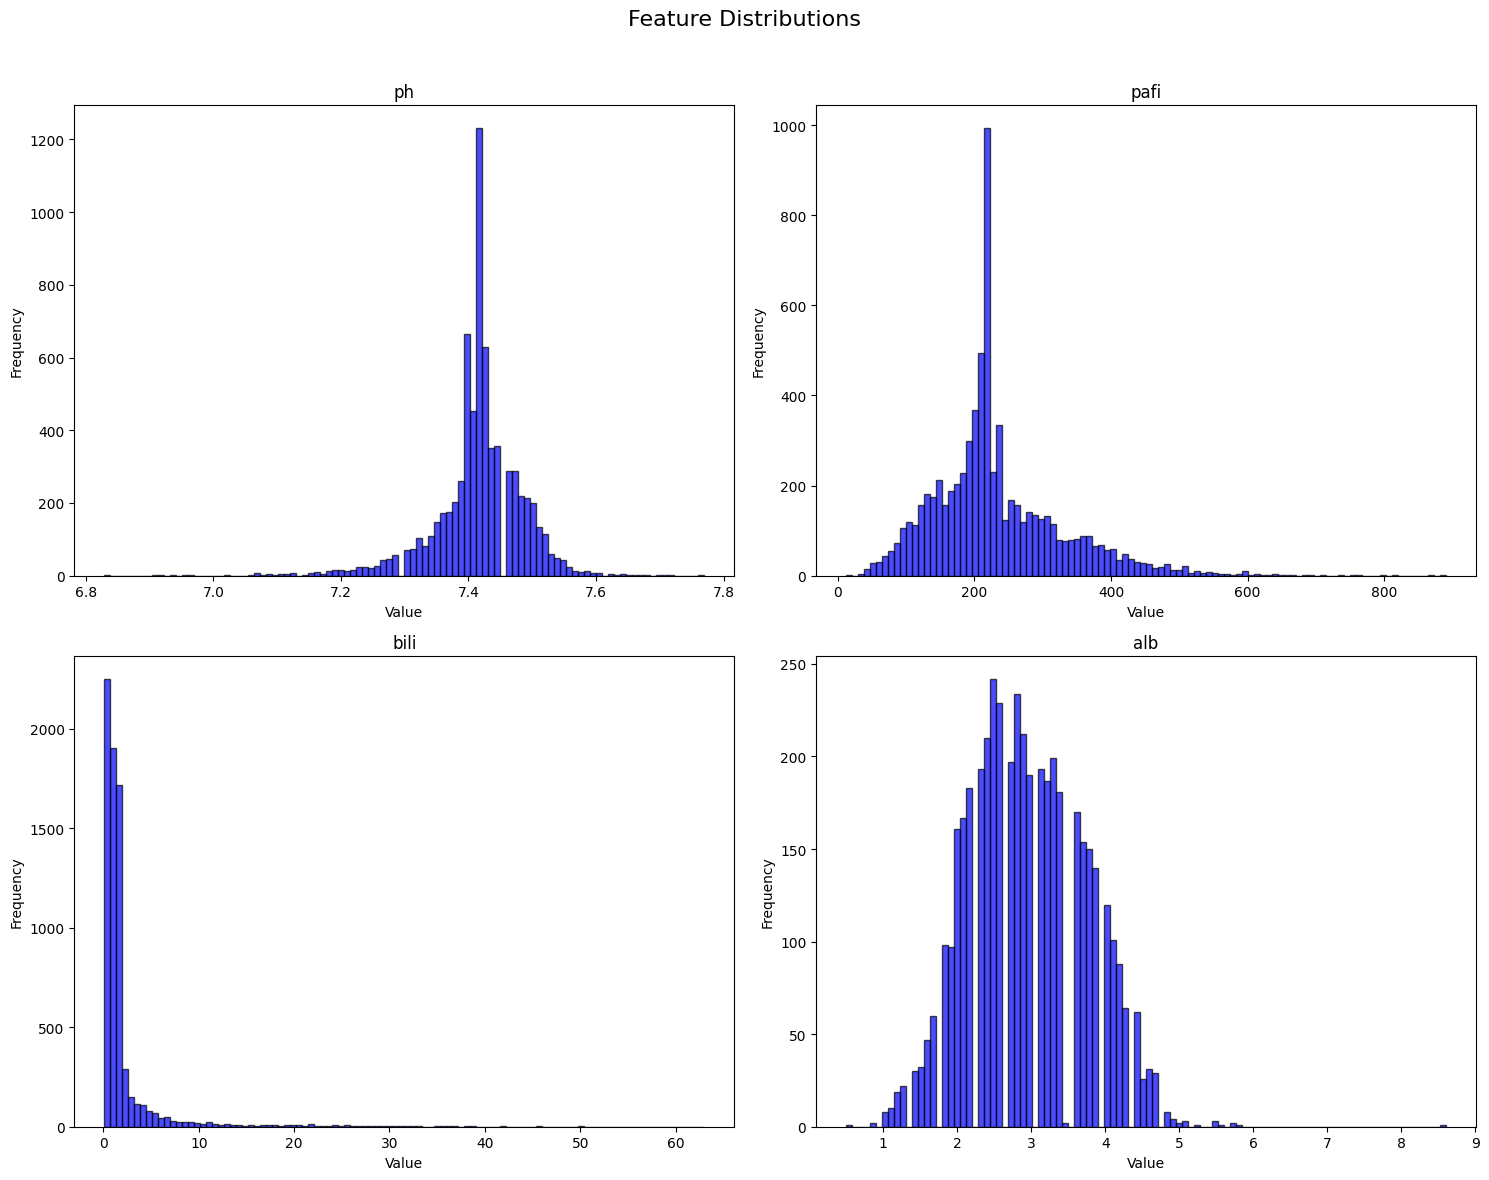

In [23]:

features = ['ph', 'pafi', 'bili', 'alb']

# Define number of rows and columns for subplots (4x4 grid)
rows, cols = 2, 2

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Feature Distributions", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    if feature in df.columns:
        axes[i].hist(df[feature].dropna(), bins=100, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(feature)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


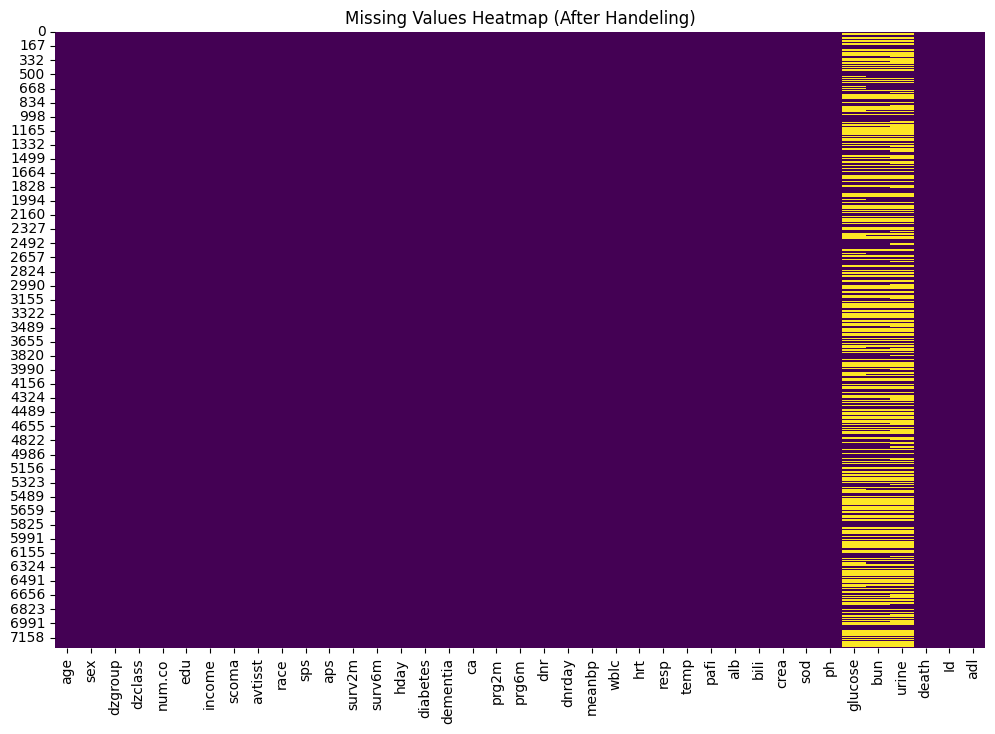

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Handeling)")
plt.show()

#### 1.5. Check for Duplicate Rows

In [20]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


#### 1.6. Check for Constant Columns

In [21]:
constant_columns = df.nunique()[df.nunique() == 1]
print("Constant columns:", constant_columns)


Constant columns: Series([], dtype: int64)


#### 1.7. Categorical Feature Cardinality Check

In [22]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


sex: 2 unique values
dzgroup: 8 unique values
dzclass: 4 unique values
race: 5 unique values
ca: 3 unique values
dnr: 3 unique values


---
---
---

## 2. Preprocessing and Feature Extraction

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


##### 2.1. Encoding Categorical Variables
- One-Hot Encoding for categorical variables with multiple categories
- Convert Binary Features (`diabetes`, `dementia`, `sex`) 'Y'/'N' to 1/0 for binary features

In [24]:
df_cleaned = pd.get_dummies(df, columns=['dzgroup', 'dzclass', 'race', 'ca', 'dnr'], drop_first=True)


In [25]:
# Convert 'Y'/'N' to 1/0 for binary features
df_cleaned['diabetes'] = df_cleaned['diabetes'].map({'Y': 1, 'N': 0})
df_cleaned['dementia'] = df_cleaned['dementia'].map({'Y': 1, 'N': 0})

# Convert 'male'/'female' to 1/0
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 1, 'female': 0})


##### 2.2. Feature Scaling (Normalization)
Since neural networks are sensitive to different scales, we should normalize numerical features.

In [26]:
scaler = MinMaxScaler()
num_features = ['age', 'num.co', 'edu', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 
                'ph', 'charges', 'totcst', 'alb', 'bili', 'glucose', 'bun', 'crea', 'pafi']

df_cleaned[num_features] = scaler.fit_transform(df_cleaned[num_features])


#### 2.3. Feature Selection
- Correlation Analysis: Remove features highly correlated with others.
- Feature Importance from Random Forest model.


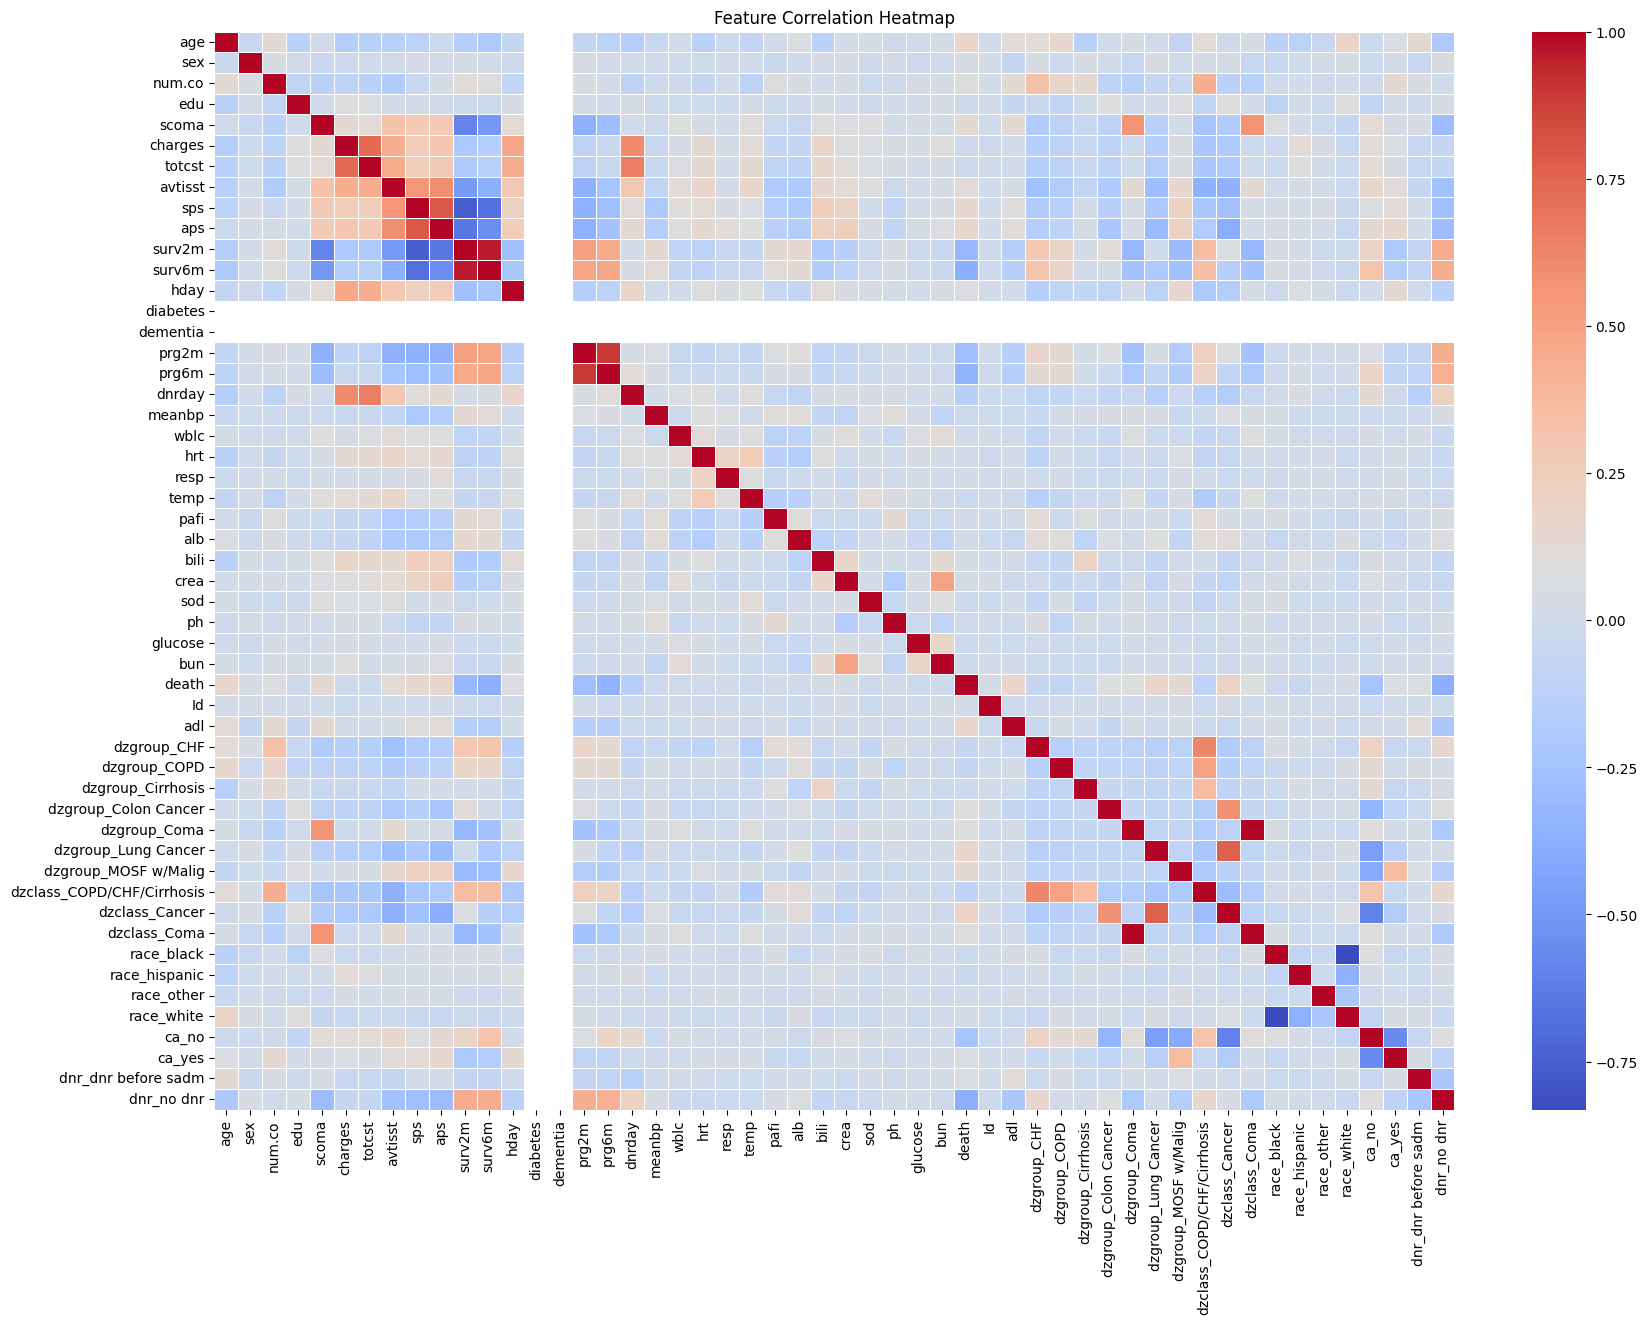

In [27]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Filter correlations related to the target variable ('death')
correlation_with_target = correlation_matrix['death'].abs().sort_values(ascending=False)

# Plot heatmap of the correlation matrix (top features only)
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()




In [29]:
X = df_cleaned.drop(columns=['death', 'Id'])  # Features
y = df_cleaned['death']  # Target variable

X.shape

(7176, 50)

In [30]:

rf = RandomForestClassifier(n_estimators=2000, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=2000, random_state=42)

In [36]:

# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']

# Keep only important features
X_reduced = X[important_features]
y_reduced = y

In [37]:
X_reduced.shape

(7176, 31)

In [ ]:
# correlation_threshold = 0.8

# corr_matrix = df_cleaned.corr().abs()

# upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# redundant_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# df_cleaned.drop(columns=redundant_features, inplace=True)


In [38]:
# # Compute correlation matrix
# correlation_matrix = X.corr()

# # Filter correlations related to the target variable ('death')
# correlation_with_target = correlation_matrix['death'].abs().sort_values(ascending=False)

# # Plot heatmap of the correlation matrix (top features only)
# plt.figure(figsize=(20, 14))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()




##### 2.4. Addressing Class Imbalance

In [ ]:
# X = df_cleaned.drop(columns=['death', 'Id'])      # Features
# y = df_cleaned['death']                           # Target variable

In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Step 2: Apply PCA on Training Data
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)

# Step 3: Transform Validation and Test Data using the same PCA transformation
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)


In [40]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [41]:
# sns.countplot(x=Y_train_resampled)
# plt.title("Class Distribution of Hospital Death")
# plt.xlabel("Hospital Death (0=No, 1=Yes)")
# plt.ylabel("Count")
# plt.show()


---
---
---

# 3. Model Development

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import LeakyReLU
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import Conv1D, Flatten

#### 3.1. Since this is a binary classification problem (death: 0 or 1), we will use a Feedforward Neural Network (FNN) with:

- Input layer: Number of features in the dataset.
- Hidden layers: 2-3 layers with ReLU activation.
- Dropout layers: To reduce overfitting.
- Output layer: 1 neuron with Sigmoid activation (to predict probability of death).

In [45]:
X_train_resampled = tf.convert_to_tensor(X_train_pca, dtype=tf.float32)
Y_train_resampled = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val_pca, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)


In [57]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate= 0.0005), loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=['accuracy'])


#### 3.2. Train the Model
- Use Early Stopping to prevent overfitting.
- Train for 50 epochs with a batch size of 64.

In [59]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)



class_weights = {0: 1.7, 1: 1.3}


history = model.fit(X_train_resampled, Y_train_resampled,
          validation_data=(X_val_pca, y_val),
          epochs=300,
          batch_size=64,
          class_weight=class_weights,
          callbacks=[early_stopping])


Epoch 1/300
72/72 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.7864 - val_loss: 0.0903 - val_accuracy: 0.7143
Epoch 2/300
72/72 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.7885 - val_loss: 0.0846 - val_accuracy: 0.6655
Epoch 3/300
72/72 [==============================] - 0s 4ms/step - loss: 0.0530 - accuracy: 0.7672 - val_loss: 0.0848 - val_accuracy: 0.6943
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.7827 - val_loss: 0.0910 - val_accuracy: 0.6986
Epoch 5/300
72/72 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.7879 - val_loss: 0.0953 - val_accuracy: 0.6934
Epoch 6/300
72/72 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.7912 - val_loss: 0.0969 - val_accuracy: 0.6977
Epoch 7/300
72/72 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.7803 - val_loss: 0.0895 - val_accuracy: 0.6908
Epoch 8/300
7

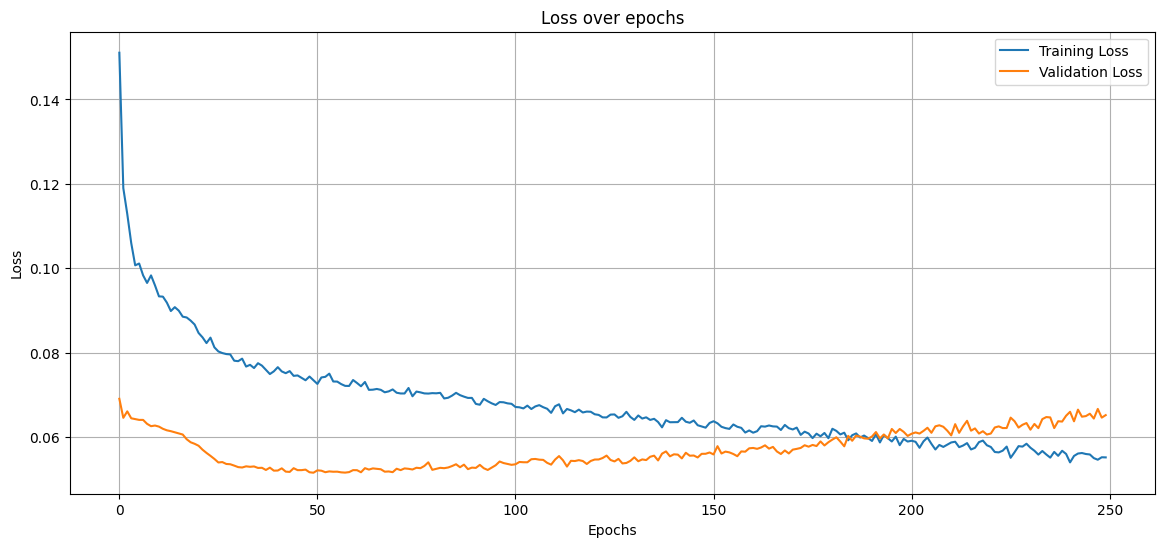

In [50]:
# Plot loss
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.grid()
plt.show()

In [51]:
from sklearn.metrics import classification_report

X_test = tf.convert_to_tensor(X_test_pca, dtype=tf.float32)

y_pred_adjusted = (model.predict(X_test) > 0.4).astype("int32")
print(classification_report(y_test, y_pred_adjusted))


45/45 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       456
           1       0.85      0.77      0.81       980

    accuracy                           0.75      1436
   macro avg       0.72      0.74      0.73      1436
weighted avg       0.77      0.75      0.76      1436

